<a href="https://colab.research.google.com/github/angelohafner/linguagem-de-programacao-udesc/blob/main/Contour_Plots_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contour Plots in Python (Matplotlib)

**Goal:** Provide a focused, hands-on tutorial on contour plots. Examples use only `numpy` and `matplotlib`.

**What you'll learn:**
1. What contour plots are and when to use them
2. `plt.contour` (line contours)
3. `plt.contourf` (filled contours)
4. Colorbars and levels
5. Colormaps
6. Labels, styling, saving (300 dpi)

**Requirements:**
- Python 3.x
- `numpy`, `matplotlib`

> All code comments are in English.


In [1]:
# Setup: imports
import numpy as np
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(42)


## 1. What are contour plots?
Contour plots visualize a scalar function of two variables, `z = f(x, y)`, by drawing curves (contours)
where the function has constant values. They are useful to:
- Inspect the shape of a 2D field (e.g., potential, temperature, elevation).
- Identify ridges, valleys, and saddle points.
- Overlay with other graphics (e.g., scatter points, paths).


In [2]:
# Helper: functions to generate demo fields
def f_peaks(x, y):
    # A smooth test function with multiple peaks and valleys
    # Reference pattern: combination of gaussians and polynomials
    z = (
        3.0 * (1.0 - x) ** 2 * np.exp(-(x ** 2) - (y + 1.0) ** 2)
        - 10.0 * (x / 5.0 - x ** 3 - y ** 5) * np.exp(-x ** 2 - y ** 2)
        - 1.0 / 3.0 * np.exp(-(x + 1.0) ** 2 - (y ** 2))
    )
    return z

def make_grid(n=200, xlim=(-3.0, 3.0), ylim=(-3.0, 3.0)):
    # Create a meshgrid for evaluating z = f(x, y)
    x = np.linspace(xlim[0], xlim[1], n)
    y = np.linspace(ylim[0], ylim[1], n)
    X, Y = np.meshgrid(x, y)
    return X, Y


## 2. Basic line contours with `plt.contour`
- `plt.contour(X, Y, Z)` draws contour lines for default levels.
- Use `levels` to control how many contours are drawn or their exact values.


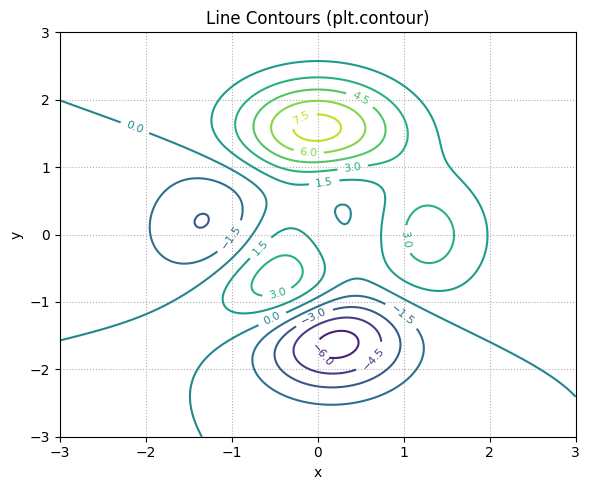

In [3]:
# Basic line contour plot
X, Y = make_grid()
Z = f_peaks(X, Y)

plt.figure(figsize=(6, 5))
cs = plt.contour(X, Y, Z, levels=10)  # draw 10 contour levels
plt.clabel(cs, inline=True, fontsize=8)  # add numeric labels to lines
plt.title('Line Contours (plt.contour)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


## 3. Filled contours with `plt.contourf`
- `plt.contourf(X, Y, Z)` fills the spaces between levels.
- Often combined with a colorbar for readability.


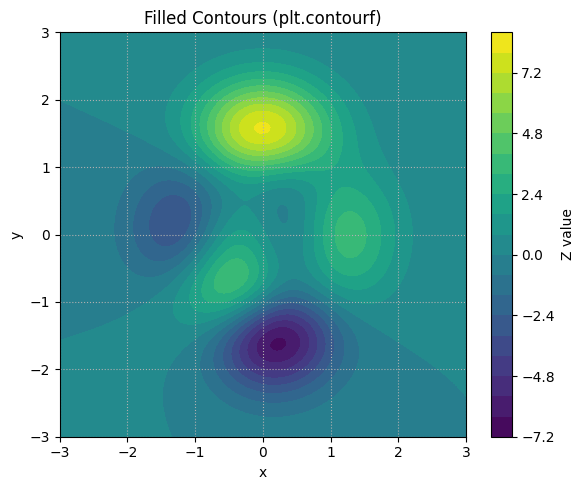

In [4]:
# Filled contour plot with colorbar
plt.figure(figsize=(6, 5))
cf = plt.contourf(X, Y, Z, levels=20)  # more levels for smoother bands
plt.colorbar(cf, label='Z value')
plt.title('Filled Contours (plt.contourf)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


## 4. Colormaps
You can choose any Matplotlib colormap via `cmap` (e.g., `'viridis'`, `'plasma'`, `'inferno'`, `'cividis'`, `'coolwarm'`).
**Tip:** Prefer perceptually uniform colormaps (e.g., `'viridis'`, `'cividis'`) for quantitative data.


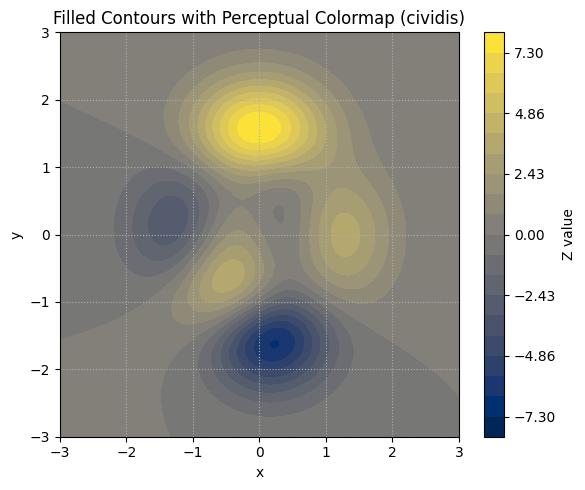

In [5]:
# Contourf with an explicit colormap and symmetric levels around 0
z_abs_max = np.max(np.abs(Z))
levels = np.linspace(-z_abs_max, z_abs_max, 21)

plt.figure(figsize=(6, 5))
cf = plt.contourf(X, Y, Z, levels=levels, cmap='cividis')
plt.colorbar(cf, label='Z value')
plt.title('Filled Contours with Perceptual Colormap (cividis)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


## 5. Overlay: `contour` on top of `contourf`
This is useful to combine filled regions with labeled contour lines.


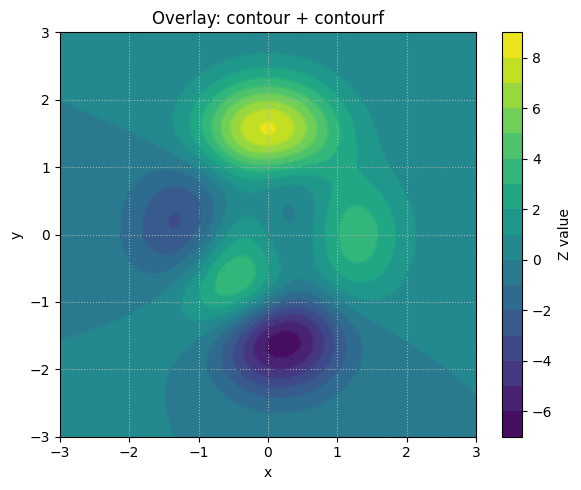

In [6]:
# Overlay line contours on top of filled contours
plt.figure(figsize=(6, 5))
cf = plt.contourf(X, Y, Z, levels=15)
cs = plt.contour(X, Y, Z, levels=15)
plt.clabel(cs, inline=True, fontsize=8)
plt.colorbar(cf, label='Z value')
plt.title('Overlay: contour + contourf')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


## 6. Exact levels and custom colorbar ticks
You can provide exact numeric levels (e.g., `levels=[-2, -1, 0, 1, 2]`) and match colorbar ticks accordingly.


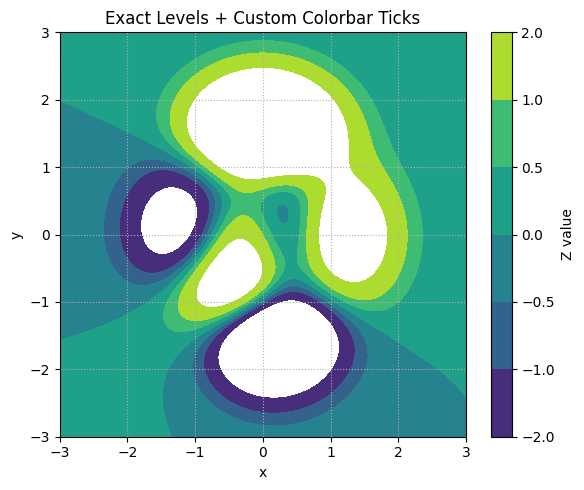

In [7]:
# Exact levels and matching colorbar ticks
exact_levels = [-2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0]

plt.figure(figsize=(6, 5))
cf = plt.contourf(X, Y, Z, levels=exact_levels)
cbar = plt.colorbar(cf)
cbar.set_ticks(exact_levels)
cbar.set_label('Z value')
plt.title('Exact Levels + Custom Colorbar Ticks')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


## 7. Handling NaNs and masks
If `Z` contains `np.nan`, those regions are left blank. You can also use masked arrays to hide data outside a region.


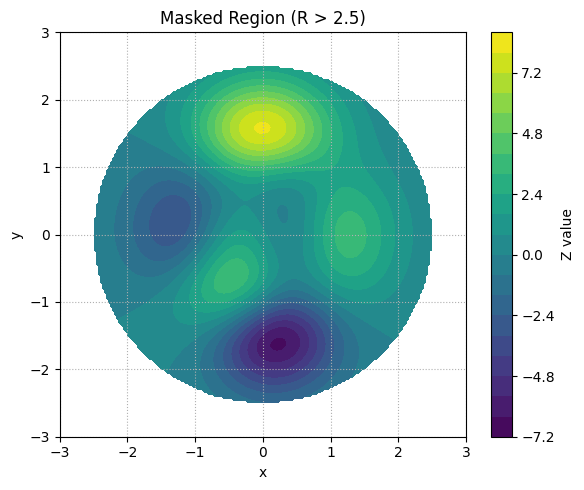

In [8]:
# Example: mask outside a radius to emphasize a region of interest
R = np.sqrt(X * X + Y * Y)
Z_masked = np.ma.masked_where(R > 2.5, Z)  # mask values where radius > 2.5

plt.figure(figsize=(6, 5))
cf = plt.contourf(X, Y, Z_masked, levels=20)
plt.colorbar(cf, label='Z value')
plt.title('Masked Region (R > 2.5)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


## 8. Overlaying additional data
You can overlay scatter points, paths, or boundaries to provide context.


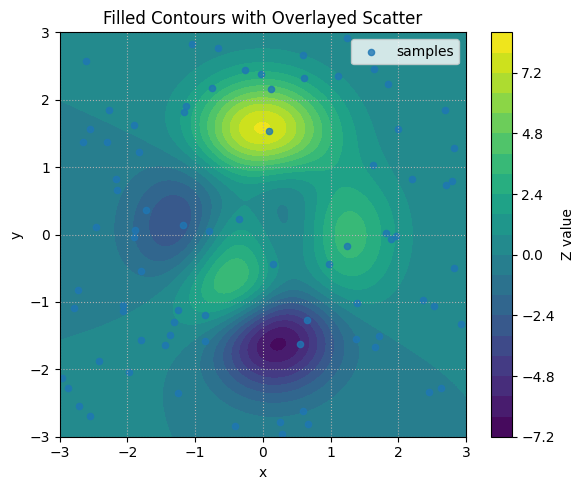

In [9]:
# Overlay random sample points on top of a filled contour
n_points = 80
x_s = np.random.uniform(-3.0, 3.0, n_points)
y_s = np.random.uniform(-3.0, 3.0, n_points)
z_s = f_peaks(x_s, y_s)

plt.figure(figsize=(6, 5))
cf = plt.contourf(X, Y, Z, levels=18)
plt.scatter(x_s, y_s, s=20, alpha=0.8, label='samples')
plt.colorbar(cf, label='Z value')
plt.legend()
plt.title('Filled Contours with Overlayed Scatter')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


## 9. Saving figures (300 dpi)
Use `plt.savefig('figure.png', dpi=300, bbox_inches='tight')` to export a high-resolution figure.


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/contour_export_example.png'

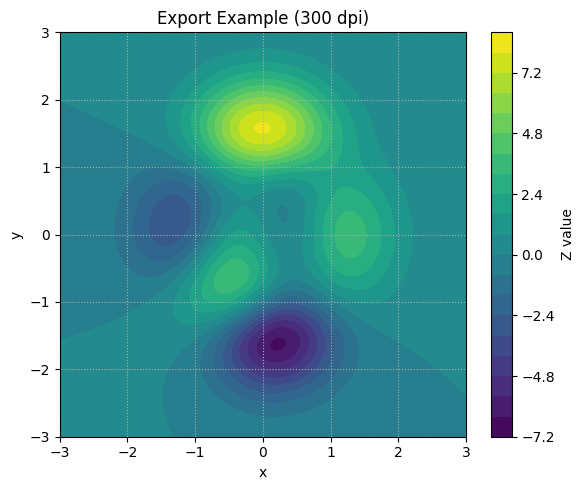

In [10]:
# Save a 300-dpi figure example
plt.figure(figsize=(6, 5))
cf = plt.contourf(X, Y, Z, levels=20)
plt.colorbar(cf, label='Z value')
plt.title('Export Example (300 dpi)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.savefig('/mnt/data/contour_export_example.png', dpi=300, bbox_inches='tight')
plt.show()
print('Saved to /mnt/data/contour_export_example.png')


## 10. Best practices
- Choose perceptually uniform colormaps for quantitative data.
- Provide a colorbar when using `contourf`.
- Use consistent axis scales and labels.
- Keep levels meaningful; too many levels can clutter the figure.
- Consider symmetric levels around 0 for signed data.
- When printing, check grayscale legibility or use hatching.
- Always save figures with sufficient resolution (e.g., 300 dpi).
